In [2]:
#!pip install EbookLib
#!pip install bs4

In [2]:
import re
import ebooklib
from ebooklib import epub
from bs4 import BeautifulSoup

ebub_file = "//home/chris/Calibre Library/Gene Kim/The Phoenix Project (295)/The Phoenix Project - Gene Kim.epub"

book = epub.read_epub(ebub_file)

In [3]:
chapters = list(book.get_items_of_type(ebooklib.ITEM_DOCUMENT))

In [4]:
def chapter_to_str(chapter):
    soup = BeautifulSoup(chapter.get_body_content(), 'html.parser')
    text = [para.get_text() for para in soup.find_all('p')]
    return ' '.join(text)

In [5]:
chapter_texts = {}
for c in chapters:
    chapter_texts[c.get_name()] = chapter_to_str(c)

In [6]:
#chapter_texts

In [7]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
#from nltk.stem import WordNetLemmatizer 

In [8]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package words to /home/chris/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/chris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/chris/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/chris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/chris/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
english_words = nltk.corpus.words.words()
stop_words = stopwords.words('english')

In [27]:
def get_wordnet_pos(tag):
    if tag[0] == 'J':
        return wordnet.ADJ
    if tag[0] == 'V':
        return wordnet.VERB
    if tag[0] == 'N':
        return wordnet.NOUN
    if tag[0] == 'R':
        return wordnet.ADV
    return wordnet.NOUN

def is_good(word):
    if len(word) < 2:
        return False
    if word in stop_words:
        return False
    if not re.match("^[a-z]+[a-zàèìòùáéíóú\-]+[a-zàèìòùáéíóú]$", word):
        return False
    return True

lemmatizer = WordNetLemmatizer()
true_pos = ['NNPS', 'NN', 'JJ', 'VBN', 'VBZ', 'VB', 'NNS', 'VBP', 'VBD', 'VBG', 'RB', 'RBR', 'JJR', 'WRB', 'JJS']

def find_lemmas(sentence):
    lemmas = []
    pos_info = nltk.pos_tag(nltk.word_tokenize(sentence))
    for p in pos_info:
        main_pos = get_wordnet_pos(p[1])
        if p[1] in true_pos:
            lemma = lemmatizer.lemmatize(p[0], main_pos).lower()
            if is_good(lemma):
                lemmas.append(lemma)
    return lemmas

In [25]:
find_lemmas("As the meeting adjourns, I ask Wes to stay behind.")

['meeting', 'adjourns', 'ask', 'stay', 'behind']

In [22]:
lemmas = []

for _, text in chapter_texts.items():
    sentences = sent_tokenize(text)
    for s in sentences:
        lemmas = lemmas + find_lemmas(s)

In [24]:
#nltk.pos_tag(nltk.word_tokenize("As the meeting adjourns, I ask Wes to stay behind."))

In [31]:
# (56700, 6235)
len(lemmas), len(list(set(lemmas)))

(56700, 6235)

All POS: 'DT', 'NNP', 'IN', ',', 'CC', 'CD', 'NNPS', '.', 'NN', 'JJ', 'VBN', 'VBZ', 'VB', 'NNS', 'TO', 'VBP', ':', 
 'PRP$', 'VBD', 'VBG', 'PRP', '(', ')', '$', 'RB', 'RP', 'WP', 'MD', 'RBR', 'WDT', 'JJR', '#', 'WRB', 'EX', 
 'JJS', 'UH', 'PDT', 'RBS', "''", 'FW', 'WP$', 'POS', '``'

In [32]:
freq_words = nltk.FreqDist(words) 

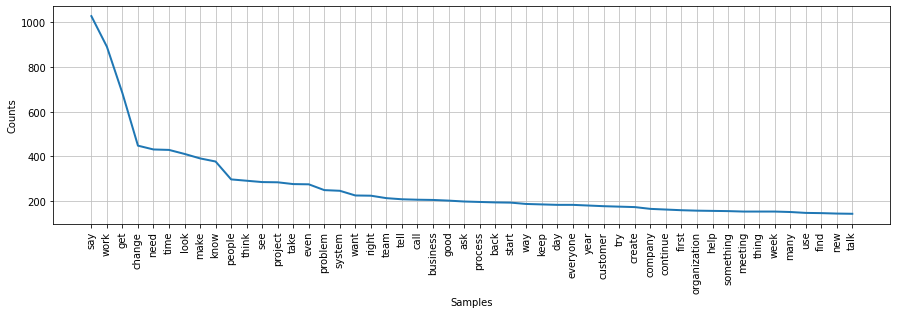

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4)) 
freq_words.plot(50, cumulative=False)

In [52]:
unique_lemmas = list(set(lemmas))

In [53]:
from nltk.corpus import words
basic_english_words = words.words('en-basic')

In [54]:
uncommon_words = list(filter(lambda x: x not in basic_english_words, unique_lemmas))

In [55]:
len(uncommon_words)

5608

In [56]:
uncommon_words.sort()

In [75]:
from nltk.corpus import wordnet

def find_definitions(word):
    c = 1
    s = ""
    for item in wordnet.synsets(word):
        s += f"({c}) {item.definition()}. "
        c += 1
    return s

In [78]:
with open("uncommon_words_with_def.txt", 'w') as f:
    for uc in uncommon_words:
        f.write(f"{uc}: {find_definitions(uc)}\n")

In [76]:
find_definitions('aback')

'(1) having the wind against the forward side of the sails. (2) by surprise. '

In [62]:
wordnet.synsets('aback')

[Synset('aback.r.01'), Synset('aback.r.02')]

In [35]:
# words not found in english dictionary
for uw in unique_words:
    if uw not in english_words:
        print(uw)

surprises
rocket-science
bullshit
work-stoppage
audiobook
responses
darkens
wip
decades
problems
hiding
check-in
tracking
russian
ignites
stamped
bringing
gravitas
instincts
risk-taking
planning
mid-sentence
weight-loss
utilized
operations
proactive
brightens
collegially
firefighter
outsourcers
stacy
defines
cross-training
gritting
on-site
clueless
decreased
improved
alcoans
web-scale
suspecting
denies
wes
kidding
ex-auditors
efforts
ever-evolving
dysfunctional
higher-up
noc
short-lived
recommended
ufo
straightjacket
dreaded
using
twenty-two
ill-conceived
space-hackers
pii
networking
stretched
reboot
whiplashed
breathtaking
benchmark
real-time
friendly-fire
real-life
psychedelic
resourced
constraints
specified
horseshit
hourlies
edits
multiyear
virtualization
high-falutin
regards
legwork
workstation
high-performance
handoff
enps
long-lasting
steve
adrian
snidely
webinar
adopting
optimizing
outsourcer
associates
http
fast-tracked
re-establish
screwups
itil
antifragility
yelled
others
hi

truckloads
costs
hiring
osha
touchy-feely
securities
interjects
applies
google
pulling
defcon
attendee
crappier
multidisciplinary
virtualized
tokenization
balloons
glitch
three-week
annoyed
adapted
reenact
flashback
clunky
big-iron
off-site
sidekick
notepad
enclosed
drive-bys
inbox
dead-on
three-digit
libraries
signed
suckered
american
twenty-five
databases
u-haul
in-house
swearing
deduplicate
billion-dollar
cufflink
groundbreaking
systems
scheduled
understaffed
rollout
impressed
reserving
badgering
stand-up
erp
mirroring
showstopper
healthcare
high-five
examples
discourages
t-shirts
seatbelt
ever-growing
arguing
fubar
coordination
re-assigning
twenty-four
ups
customers
pci
mid-thirties
leveling-up
man-month
workflow
stairwell
loosely-coupled
lowered
keystroke
organisation
well-oiled
cross-shipment
low-risk
doomed
computerized
products
hawaiian
sixty-four-character
organizations
bullpen
asking
bottlenecked
mrp
never-ending
marines
nods
soul-searching
thirty-minute
adamantly
recabling
o

In [250]:
# print words appearing at most 3 times
list(filter(lambda x: freq_words[x]<2, freq_words.keys()))

['copyright',
 'selection',
 'retirement',
 'tumble',
 'outmaneuver',
 'arch',
 'rival',
 'instantly',
 'institutional',
 'reconfigure',
 'turbulent',
 'doctor',
 'toddler',
 'cough',
 'intermittent',
 'turf',
 'cajole',
 'breezily',
 'unparalleled',
 'customize',
 'mud',
 'leapfrog',
 'ballistic',
 'music',
 'competitiveness',
 'hill',
 'nicely',
 'classy',
 'dingy',
 'dank',
 'nurse',
 'critically',
 'loom',
 'rehabilitation',
 'sensitivity',
 'banter',
 'grace',
 'numbly',
 'subspace',
 'clockwork',
 'acronym',
 'seniority',
 'inherently',
 'powerpoints',
 'hr-trained',
 'voluntary',
 'whack',
 'goon',
 'fetch',
 'briskly',
 'construct',
 'cigar',
 'vanquish',
 'cheerfulness',
 'flesh',
 'ex-boss',
 'persian',
 'sculpture',
 'propeller',
 'uniform',
 'tropical',
 'insignia',
 'lapel',
 'flat',
 'superbly',
 'brisk',
 'businesslike',
 'cocky',
 'eighteen-year-old',
 'straighten',
 'coddle',
 'politician',
 'howl',
 'pragmatic',
 'edict',
 'decline',
 'backpeddle',
 'flood',
 'glorify

In [36]:
freqs = {}
for word,freq in freq_words.items():
    if freq in freqs:
        freqs[freq] += 1
    else:
        freqs[freq] = 1

In [37]:
freqs

{1: 2709,
 12: 69,
 69: 4,
 4: 320,
 2: 935,
 224: 1,
 44: 7,
 3: 507,
 73: 4,
 70: 3,
 40: 6,
 9: 93,
 6: 166,
 11: 62,
 10: 74,
 17: 25,
 15: 52,
 16: 37,
 18: 30,
 7: 143,
 64: 3,
 28: 16,
 180: 1,
 58: 4,
 165: 1,
 26: 9,
 55: 4,
 8: 108,
 13: 51,
 48: 11,
 128: 3,
 183: 2,
 162: 1,
 25: 14,
 177: 1,
 431: 1,
 21: 24,
 46: 7,
 35: 11,
 127: 1,
 111: 1,
 41: 4,
 29: 12,
 76: 2,
 151: 1,
 38: 9,
 20: 30,
 206: 1,
 116: 2,
 60: 4,
 92: 3,
 159: 1,
 22: 26,
 74: 3,
 448: 1,
 47: 7,
 103: 5,
 23: 19,
 131: 2,
 391: 1,
 52: 8,
 429: 1,
 1028: 1,
 126: 1,
 5: 211,
 97: 1,
 72: 4,
 57: 5,
 42: 3,
 50: 5,
 175: 1,
 185: 1,
 32: 5,
 249: 1,
 19: 27,
 67: 3,
 53: 6,
 65: 4,
 275: 1,
 110: 2,
 89: 3,
 297: 1,
 59: 3,
 36: 7,
 33: 8,
 14: 55,
 153: 3,
 202: 1,
 39: 4,
 75: 4,
 91: 3,
 34: 13,
 225: 1,
 115: 2,
 68: 1,
 109: 2,
 208: 1,
 51: 5,
 85: 2,
 107: 5,
 43: 7,
 291: 1,
 411: 1,
 194: 1,
 80: 3,
 143: 1,
 144: 1,
 27: 18,
 891: 1,
 31: 10,
 101: 2,
 683: 1,
 49: 4,
 138: 1,
 71: 7,
 37: 

In [38]:
for k in sorted(freqs):
    print (f"{k}: {freqs[k]}")

1: 2709
2: 935
3: 507
4: 320
5: 211
6: 166
7: 143
8: 108
9: 93
10: 74
11: 62
12: 69
13: 51
14: 55
15: 52
16: 37
17: 25
18: 30
19: 27
20: 30
21: 24
22: 26
23: 19
24: 14
25: 14
26: 9
27: 18
28: 16
29: 12
30: 5
31: 10
32: 5
33: 8
34: 13
35: 11
36: 7
37: 7
38: 9
39: 4
40: 6
41: 4
42: 3
43: 7
44: 7
45: 4
46: 7
47: 7
48: 11
49: 4
50: 5
51: 5
52: 8
53: 6
54: 4
55: 4
56: 4
57: 5
58: 4
59: 3
60: 4
61: 3
62: 3
63: 5
64: 3
65: 4
67: 3
68: 1
69: 4
70: 3
71: 7
72: 4
73: 4
74: 3
75: 4
76: 2
78: 2
79: 3
80: 3
81: 4
82: 1
84: 2
85: 2
86: 3
87: 1
88: 1
89: 3
91: 3
92: 3
94: 3
95: 1
96: 1
97: 1
100: 4
101: 2
102: 1
103: 5
106: 1
107: 5
108: 2
109: 2
110: 2
111: 1
112: 1
114: 1
115: 2
116: 2
117: 1
118: 2
123: 1
124: 1
126: 1
127: 1
128: 3
130: 1
131: 2
132: 1
137: 1
138: 1
142: 1
143: 1
144: 1
146: 1
147: 1
151: 1
153: 3
155: 1
156: 1
157: 1
159: 1
162: 1
165: 1
173: 1
175: 1
177: 1
180: 1
183: 2
185: 1
187: 1
193: 1
194: 1
196: 1
198: 1
202: 1
205: 1
206: 1
208: 1
213: 1
224: 1
225: 1
246: 1
249: 1
275

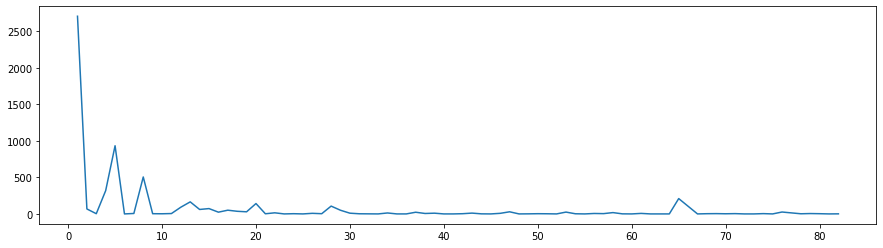

In [39]:
plt.figure(figsize=(15, 4))  # the size you want
plt.plot(list(sorted(freqs))[0:80], list(freqs.values())[0:80])